In [157]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [158]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

## Perform API Calls

In [159]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "Los Angeles"
units = "metric"

query_url = f"{url}appid={api_key}&q={city}&units={units}"
# Get the names of lists, dictionaries, and tuples
weather_response = requests.get(query_url)
weather_json = weather_response.json()
pprint(weather_json)

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 34.05, 'lon': -118.24},
 'dt': 1532321880,
 'id': 5368361,
 'main': {'humidity': 69,
          'pressure': 1015,
          'temp': 24.87,
          'temp_max': 29,
          'temp_min': 21},
 'name': 'Los Angeles',
 'sys': {'country': 'US',
         'id': 416,
         'message': 0.0063,
         'sunrise': 1532350693,
         'sunset': 1532401220,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 111.001, 'speed': 0.72}}


In [160]:
# Starting URL for Weather Map API Call
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={api_key}&q="

cities = pd.DataFrame({"City": cities})
cities["Max Temp"] = ""
cities["Humidity"] = ""
cities["Cloudiness"] = ""
cities["Wind Speed"] = ""
cities["Lat"] = ""
cities["Lng"] = ""
cities["Country"] = ""

for index, row in cities.iterrows():
    city = row["City"]
    response = requests.get(url + city).json()
    
    try:
        print(f"Searching Data {index + 1} of {len(cities)} | {city}")
        print(url + city)
        
        cities.loc[index, "Max Temp"] = response["main"]["temp_max"]
        cities.loc[index, "Humidity"] = response["main"]["humidity"]
        cities.loc[index, "Cloudiness"] = response["clouds"]["all"]
        cities.loc[index, "Wind Speed"] = response["wind"]["speed"]
        cities.loc[index, "Lat"] = response["coord"]["lat"]
        cities.loc[index, "Lng"] = response["coord"]["lon"]
        cities.loc[index, "Country"] = response["sys"]["country"]
    
        
    except (KeyError, IndexError):
        print("City Not Found")
        
print("-------------------------")
print("Data Requests Complete")
print("-------------------------")

Searching Data 1 of 607 | mar del plata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=mar del plata
Searching Data 2 of 607 | hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=hermanus
Searching Data 3 of 607 | eyl
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=eyl
Searching Data 4 of 607 | geraldton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=geraldton
Searching Data 5 of 607 | arkhangelos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=arkhangelos
City Not Found
Searching Data 6 of 607 | albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=albany
Searching Data 7 of 607 | mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APP

Searching Data 56 of 607 | werda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=werda
Searching Data 57 of 607 | ketchikan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=ketchikan
Searching Data 58 of 607 | guarapari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=guarapari
Searching Data 59 of 607 | ixtapa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=ixtapa
Searching Data 60 of 607 | belushya guba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=belushya guba
City Not Found
Searching Data 61 of 607 | balabac
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=balabac
Searching Data 62 of 607 | broken hill
http://api.openweathermap.org/data/2.5/weather?units=Imp

Searching Data 112 of 607 | makushino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=makushino
Searching Data 113 of 607 | dawei
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=dawei
Searching Data 114 of 607 | amnat charoen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=amnat charoen
Searching Data 115 of 607 | buariki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=buariki
City Not Found
Searching Data 116 of 607 | saint-philippe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=saint-philippe
Searching Data 117 of 607 | paamiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=paamiut
Searching Data 118 of 607 | sentyabrskiy
http://api.openweathermap.org/data/2

Searching Data 166 of 607 | sevierville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=sevierville
Searching Data 167 of 607 | zhanaozen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=zhanaozen
Searching Data 168 of 607 | abapo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=abapo
Searching Data 169 of 607 | port macquarie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=port macquarie
Searching Data 170 of 607 | malwan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=malwan
City Not Found
Searching Data 171 of 607 | pochutla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=pochutla
Searching Data 172 of 607 | union
http://api.openweathermap.org/data/2.5/weather?

Searching Data 220 of 607 | olden
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=olden
Searching Data 221 of 607 | mangan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=mangan
Searching Data 222 of 607 | alofi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=alofi
Searching Data 223 of 607 | koroni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=koroni
Searching Data 224 of 607 | lidorikion
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=lidorikion
City Not Found
Searching Data 225 of 607 | erzin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=erzin
Searching Data 226 of 607 | morlaix
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157

Searching Data 275 of 607 | cap malheureux
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=cap malheureux
Searching Data 276 of 607 | vestmannaeyjar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=vestmannaeyjar
Searching Data 277 of 607 | cam ranh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=cam ranh
Searching Data 278 of 607 | stockach
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=stockach
Searching Data 279 of 607 | gediz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=gediz
Searching Data 280 of 607 | victor harbor
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=victor harbor
Searching Data 281 of 607 | garanhuns
http://api.openweathermap.org/data/2.5/w

Searching Data 330 of 607 | agirish
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=agirish
Searching Data 331 of 607 | tiksi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=tiksi
Searching Data 332 of 607 | meyungs
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=meyungs
City Not Found
Searching Data 333 of 607 | maun
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=maun
Searching Data 334 of 607 | afmadu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=afmadu
City Not Found
Searching Data 335 of 607 | margate
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=margate
Searching Data 336 of 607 | lorengau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&A

Searching Data 385 of 607 | manthani
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=manthani
Searching Data 386 of 607 | forio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=forio
Searching Data 387 of 607 | pindwara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=pindwara
Searching Data 388 of 607 | ancud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=ancud
Searching Data 389 of 607 | presidencia roque saenz pena
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=presidencia roque saenz pena
Searching Data 390 of 607 | shelbyville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=shelbyville
Searching Data 391 of 607 | halifax
http://api.openweathermap.org/data/2

Searching Data 440 of 607 | alekseyevka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=alekseyevka
Searching Data 441 of 607 | alghero
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=alghero
Searching Data 442 of 607 | ankpa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=ankpa
Searching Data 443 of 607 | lompoc
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=lompoc
Searching Data 444 of 607 | coari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=coari
Searching Data 445 of 607 | manzanillo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=manzanillo
Searching Data 446 of 607 | rabo de peixe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086

Searching Data 494 of 607 | tautira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=tautira
Searching Data 495 of 607 | mugumu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=mugumu
Searching Data 496 of 607 | mumbwa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=mumbwa
Searching Data 497 of 607 | bar harbor
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=bar harbor
Searching Data 498 of 607 | cairns
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=cairns
Searching Data 499 of 607 | pontes e lacerda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=pontes e lacerda
Searching Data 500 of 607 | kloulklubed
http://api.openweathermap.org/data/2.5/weather?units=Imperia

Searching Data 549 of 607 | lovozero
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=lovozero
Searching Data 550 of 607 | kathmandu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=kathmandu
Searching Data 551 of 607 | aflu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=aflu
City Not Found
Searching Data 552 of 607 | ust-tsilma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=ust-tsilma
Searching Data 553 of 607 | vardo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=vardo
Searching Data 554 of 607 | nizwa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=nizwa
Searching Data 555 of 607 | koscian
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6

Searching Data 604 of 607 | taganak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=taganak
Searching Data 605 of 607 | tumpat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=tumpat
Searching Data 606 of 607 | alyangula
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=alyangula
Searching Data 607 of 607 | prince rupert
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=prince rupert
-------------------------
Data Requests Complete
-------------------------


In [161]:
#Removing cities not found
cities = cities[cities["Country"] != ""]
cities.head()

,City,Max Temp,Humidity,Cloudiness,Wind Speed,Lat,Lng,Country
0,mar del plata,37.68,90,0,14.25,-46.43,-67.52,AR
1,hermanus,69.27,33,0,9.66,-34.42,19.24,ZA
2,eyl,81.96,68,0,23.98,7.98,49.82,SO
3,geraldton,60.8,72,5,3.36,49.72,-86.95,CA
5,albany,73.4,94,90,5.82,42.65,-73.75,US


In [162]:
# Export file into CSV
cities.to_csv(output_data_file, index = False, header = True)

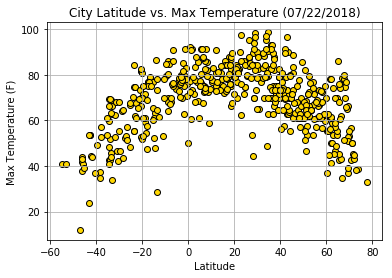

In [163]:
plt.scatter(cities["Lat"],cities["Max Temp"], marker="o", facecolor="gold", edgecolor="black")
date = time.strftime("%m/%d/%Y")
plt.title(f"City Latitude vs. Max Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

plt.savefig("../output_data/City_Latitude_vs_Max_Temperature.png")

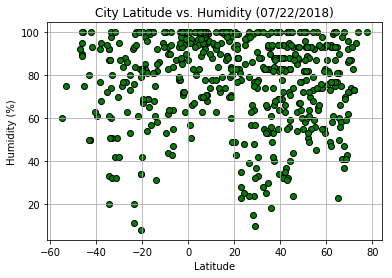

In [164]:
plt.scatter(cities["Lat"], cities["Humidity"], marker="o", facecolor="green", edgecolor="black")
date = time.strftime("%m/%d/%Y")
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.savefig("../output_data/city_latitude_vs_humidity.png")

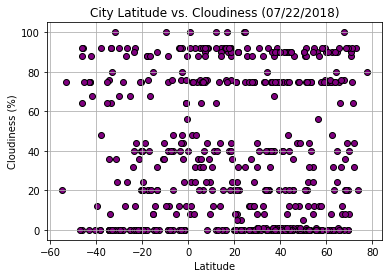

In [165]:
plt.scatter(cities["Lat"], cities["Cloudiness"], marker="o", facecolor="purple", edgecolor="black")
date = time.strftime("%m/%d/%Y")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.savefig("../output_data/city_latitude_vs_cloudiness")

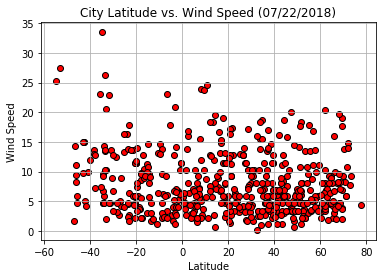

In [166]:
plt.scatter(cities["Lat"], cities["Wind Speed"], marker="o", facecolor="red", edgecolor="black")
date = time.strftime("%m/%d/%Y")
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("../output_data/city_latitude_vs_wind_speed")